# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [36]:
candidateno=246518 #this MUST be updated to your candidate number so that you get a unique data sample


In [37]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [38]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [39]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['getting', 'it', 'right', 'is', 'a', 'far', 'far', ...], 'pos')



1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [40]:

# ------- Preperation -------

training_list=[(list(wordlist),label) for (wordlist,label) in training_data] ## Putting wordlists list form instead of streamedbackcorpusview.
testing_list=[(list(wordlist),label) for (wordlist,label) in testing_data]  ## Same thing here ^
stop = stopwords.words('english') #fetching stopwords


# ------- Normalisation -------

def normalise(wordlist):
  
  lowered=[word.lower() for word in wordlist] #lowing words
  nostop= [word for word in lowered if word.isalpha() and word not in stop] #remove stopwords
  return nostop
  

training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
testing_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]


# ------- Conversion to FreqDists -------

pos_freq_dist=FreqDist() #Frequency distribution of words in positive
neg_freq_dist=FreqDist() #Frequency distribution of words in negative review

for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist
        
# ------- Top words Fetcher -------

#fetching the difference betwen the most positive and most negative words (removes shared words and shows unique ones to each set.)
def most_frequent_words(freq1,freq2,max):
    difference=freq1-freq2
    sorteddiff=difference.most_common()
    words = [word for (word,freq) in sorteddiff[:max]]
    return words

positive_long_list = most_frequent_words(pos_freq_dist,neg_freq_dist,500) ##longer lists for future use in Q5
negative_long_list = most_frequent_words(neg_freq_dist,pos_freq_dist,500) 


print("Top 10 Positive Words:", positive_long_list[:10])
print("Top 10 Negative Words:", negative_long_list[:10])

Top 10 Positive Words: ['film', 'also', 'life', 'well', 'story', 'one', 'best', 'many', 'great', 'world']
Top 10 Negative Words: ['movie', 'bad', 'plot', 'worst', 'script', 'stupid', 'boring', 'supposed', 'action', 'nothing']



---
##<b><u>Part A</u></b>
<b>Positive words:</b>   
film, also, life, well, story, one, best, many, great, world

---
##<b><u>Part B</u></b>
<b>Negative words:</b>

movie, bad, plot, worst, script, stupid, boring, supposed, action, nothing

---
##<b><u>Part C</u></b>
Within the above code cell, I have written code which gives two lists of 10 content words which are representative of the positive and negative reviews within the training data provided.

I have split this code cell into a couple of separate 'stages' for increased readability and ease of explanation.

###<u>Preparation</u>

The training data provided is in a format which I find difficult to work with.
I prefer to work with `list` items rather than `StreamBackedCorpusView` as I am more confident with the former and find list items easier to use during troubleshooting. 
 
<br>

Because of this, I converted training_data and testing_data:

from:

>List of Tuples of (StreamBackedCorpusView, String)

To:

> List of Tuples of (List of Strings, String)

This was done using a simple comprehension.

After this, I imported a list of pre-defined stopwords from NLTK to use in my normalisation function.

<br>

###<u>Normalisation</u>

I've written a function which normalises a list of string tokens.
The function does this by iterating through, and applying a couple of steps to each word in a document.

The steps are as follows:
- Convert every word to lowercase, this eliminates differently-cased 
duplicates within Frequency Distributions, as FreqDist keys are case sensitive.
- Remove any tokens that aren't fully alphabetic as they have no semantic value for classifying if a review is positive or negative.
- Remove any words which are found in the set of stopwords I imported beforehand, as stopwords do not have any semantic value either.


After this, I normalised all of the training data and testing data into two new lists called `training_norm` and `testing_norm` for future use.

###<u>Conversion to Freq Dists</u>

Next, I fed my training document list into two Frequency Distributions, one for documents labelled as positive sentiment (which show the most common positive words), and one for documents labelled as negative sentiment (which shows the most common negative words). 


I could've stopped here, but noticed that many of the top words between the two distributions were identical.



###<u>Fetching top words</u> 

To fix this, I wrote a function `most_frequent_words` which takes two frequency distributions and an additional number. 


The function subtracts the words of `Freq2` from `Freq1` to give the most distinct and 'most telling' words of the Freq1 class.  
These new 'most telling' word lists are suitable enough to classify documents with.

The function also takes a number `max` lets us take the top n words from this word list.

<br>

I use this function twice to create two sorted lists (by word frequency) of the top 500 words indicating positive and negative sentiment respectively. 
The large list size is a future proofing measure for Question 5 to stop this function from running every time a wordlist of a new size is needed.

For parts A and B, I returned the first 10 words from the large list.

 ---

2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [41]:
import random


def classify(document,pos_word_list,neg_word_list, offset):
 sentiment = 0                          #sentiment: negative for negative, positive for positive.
 for word in document:
   if word in pos_word_list:
     sentiment += 1
   if word in neg_word_list:
     sentiment -= 1

 if sentiment > offset:
    return "pos"
 if sentiment < offset:
   return "neg"
 elif sentiment == offset:
   return random.choice(['pos','neg']) #This can create some randomness within the classifier, might be a problem with Q5.    

---
Within the above code block, I have created a function which classifies if an inputted document has a positive or negative sentiment to it. The Function takes four parameters:
- `document`: the document being classified.
- `pos_word_list`: a word list of positive words.
- `neg_word_list`: a word list of negative words. 
- `offset`: a number which can move the threshold which the classifier uses for classifying reviews as positive or negative. (Higher means it's more strict on positive, Lower means more strict on negative.)

<br>

The provided document gets a 'sentiment' score, which the classifier uses to decide if it is positive or negative. This sentiment score starts at zero.


Using a for loop, the classifier iterates through every word in a document. Each word is checked against the positive word list and negative word list provided.

If the word occurs in the positive word list, `sentiment` is incremented.

If the word occurs in the negative word list, `sentiment` is decremented.

If the word occurs in neither word lists, `sentiment` is unchanged.

Once every word within the document has been iterated through, the function checks the sentiment score.

`'pos'` is returned if `sentiment` is greater than `offset`.

`'neg'` is returned if  `sentiment` is less than `offset`.

A random choice between `'pos'` and `'neg'` is returned if `sentiment` is equal to `offset`.




---

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [42]:
## returns list of 4 ints, [True positive, True Negative, False Positive, False Negative]
def get_stats(data_to_be_classified, word_classifier_list_length, offset):
  i = 0
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for (document,label) in data_to_be_classified:
   
    prediction = classify(document, positive_long_list[:word_classifier_list_length], negative_long_list[:word_classifier_list_length], offset) # i hope this works first try
    actual = label
 
    if prediction == 'pos' and actual == 'pos':
      TP += 1
    if prediction == 'neg' and actual == 'neg':
      TN += 1
    if prediction == 'neg' and actual == 'pos':
      FN += 1
    if prediction == 'pos' and actual == 'neg':
      FP += 1
  return [TP,TN,FP,FN]


top_10_results = get_stats(testing_data,10,0)


print("""True Positives: {}
True Negatives: {}
False Positives: {}
False Negatives: {}""".format(top_10_results[0],top_10_results[1],top_10_results[2],top_10_results[3]))

True Positives: 278
True Negatives: 74
False Positives: 226
False Negatives: 22


In [43]:
#---- result parameter for these functions is the[TP, TN, FP, FN] output list from get_stats() ----

def as_accuracy(results):
 tp = results[0] #variable names for easier readability
 tn = results[1]
 fp = results[2]
 fn = results[3]
 return round((tp+tn)/(tp+tn+fp+fn),3)


def as_precision(results):
 tp = results[0] #variable names for easier readability
 tn = results[1]
 fp = results[2]
 fn = results[3]
 return round(tp/(tp+fp), 3)
 

def as_recall(results):
 tp = results[0] #variable names for easier readability
 tn = results[1]
 fp = results[2]
 fn = results[3]
 return round(tp/(tp+fn), 3)

def as_f1(results):
  p = as_precision(results)
  r = as_recall(results)
  return round( (2 * p * r ) / ( p + r ), 3)

def get_all_stat_measures(results):
  return {"Accuracy" : as_accuracy(results), "Precision" : as_precision(results), "Recall" : as_recall(results), "F1" : as_f1(results)} #using dictionary since it'll be easier to fetch these values for Q5


get_all_stat_measures(top_10_results)

{'Accuracy': 0.587, 'Precision': 0.552, 'Recall': 0.927, 'F1': 0.692}

---
I believe, for this data set, accuracy alone is a measure that can be used to evaluate classifier performance, as accuracy gives a ratio of what documents have been correctly classified.

My reasoning for this conclusion is that the training and testing datasets that have been provided to me are balanced, with a 50/50 split of positive and negative sentiment documents.


If the data sets were unbalanced, I would be much more likely to recommend using F1 score, a combined measure of Precision and Recall, to evaluate my classifier's performance.

I would do this because accuracy only works as a good evaluator if the data is balanced.

Feeding unbalanced testing data, as an extreme example, 98% positive & 2% negative testing dataset, into a classifier that guesses that all reviews are positive would achieve 0.98 accuracy; giving a false sense of 'achievement' in regards to the classifier's performance. 

In a situation like this, using F1 score (made up of precision and recall) would be more suitable, as precision and recall would consider the impact that false positives and false negatives have.


But, since the data I have been given is split in a 50/50 manner, I believe accuracy is a suitable measure for evaluating classifier performance.

---


4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

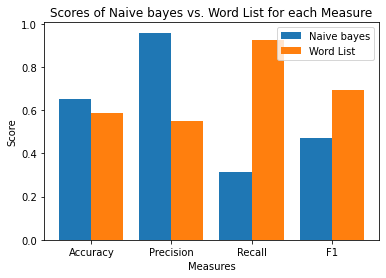

In [45]:
from nltk import NaiveBayesClassifier 
import nltk.metrics
import collections
from nltk.metrics.scores import (precision, recall, f_measure)
import numpy as np

##invoking NB classifier from nltk
naive_bayes_classifier = nltk.NaiveBayesClassifier.train(training_norm)





##Fetching NB measures

predictions, gold_labels = collections.defaultdict(set), collections.defaultdict(set)

for i, (features, label) in enumerate(testing_norm):
    predictions[naive_bayes_classifier.classify(features)].add(i)
    gold_labels[label].add(i) 


nb_accuracy = nltk.classify.accuracy(naive_bayes_classifier, testing_norm)
wl_accuracy = as_accuracy(top_10_results)

nb_precision = precision(gold_labels[label], predictions[label])
wl_precision = as_precision(top_10_results)

nb_recall = recall(gold_labels[label], predictions[label])
wl_recall = as_recall(top_10_results)

nb_f1 = f_measure(gold_labels[label], predictions[label])
wl_f1 = as_f1(top_10_results)



#NB first, WL second

nb = [nb_accuracy, nb_precision, nb_recall, nb_f1]
wl = [wl_accuracy, wl_precision, wl_recall, wl_f1]


bar_accuracy = [nb_accuracy, wl_accuracy]
bar_precision = [nb_precision, wl_precision]
bar_recall = [nb_recall, wl_recall]
bar_f1 = [nb_f1, wl_f1]

##Graph stuff

labels = ['Accuracy','Precision','Recall','F1']
  
X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, nb, 0.4, label = 'Naive bayes')
plt.bar(X_axis + 0.2, wl, 0.4, label = 'Word List')
  
plt.xticks(X_axis, labels)
plt.xlabel("Measures")
plt.ylabel("Score")
plt.title("Scores of Naive bayes vs. Word List for each Measure")
plt.legend()
plt.show()



---
The output of my code shows a bar chart of four different measures (Accuracy, Precision, Recall, and F1) of classifier score for NLTK's Naive Bayes Classifier, and the wordlist classifier I made. (hencefourth referred to as NB and WLC respectively.)

###Accuracy
Accuracy between the two classifiers is very similar at 0.65 & 0.58 for NB and WLC respectively, From this I'm able to conclude that both wordlists are able to correctly identify the majority of documents provided.

<br>

###Precision & Recall
NB has a  high precision value and low recall value of 0.96 & 0.31 respectively. This indicates that NB is strict when it comes to classifying a document as positive, leading to many false negatives but very little false positives.   

On the other hand, WLC has a low precision value and high recall value of 0.55 and 0.93 respectively. This indicates that WLC is much more likely to label a document as positive rather than negative, leading to a high number of false positives.


###F1 Score

F1 score works well as a general evaluation of each classifier. WL Has a higher F1 score of 0.69 than NB, which has an F1 score of 0.47. 

Given that F1 score is a combination of both Prescision and Recall which measures the overall performance of the classifier, I believe WL should be classed as the better 'general' classifier. 





###Conclusion
The results of this show that NB and WLC may be more suitable for different applications. NB is more 'careful' with what it labels as positive which means that whatever is classified as positive is likely to actually be positive, meaning NB can be applied where data accuracy is imporatant.

Whereas WL is more 'forgiving', meaining it could be more suitable for positively classifying reviews where the sentiment is unclear.  





---

5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


------------------------------------------------------------


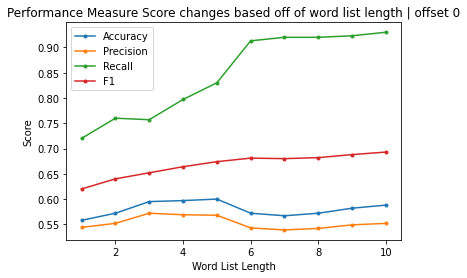

------------------------------------------------------------


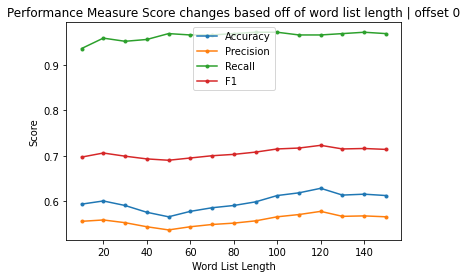

------------------------------------------------------------


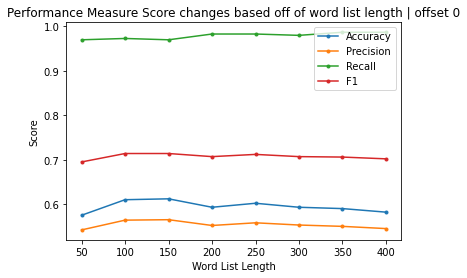

In [46]:
def experiment(index_counts,offset): 
 data_for_table = []
 
 for num in index_counts:
  data_for_table.append(get_all_stat_measures(get_stats(testing_data,num,offset)))
 
 
 accuracy_list = [statset.get("Accuracy") for statset in data_for_table]
 precision_list = [statset.get("Precision") for statset in data_for_table]
 recall_list = [statset.get("Recall") for statset in data_for_table]
 f1_list = [statset.get("F1") for statset in data_for_table]

 #Table stuff
 data = {
  "Accuracy": accuracy_list,
  "Precision": precision_list,
  "Recall": recall_list,
  "F1": f1_list 
 }


 df = pd.DataFrame(data, index = index_counts)
 df.index.name = "Word Count"

 print("------------------------------------------------------------")



 
 plt.plot(index_counts, accuracy_list, label = "Accuracy", marker = '.')
 plt.plot(index_counts, precision_list, label = "Precision", marker = '.')
 plt.plot(index_counts, recall_list, label = "Recall", marker = '.')
 plt.plot(index_counts, f1_list, label = "F1", marker = '.')

 plt.xlabel("Word List Length")
 plt.ylabel("Score")
 plt.title("Performance Measure Score changes based off of word list length | offset {}".format(offset) )
 plt.legend()
 plt.show()

experiment([1,2,3,4,5,6,7,8,9,10],0)
experiment([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150],0)
experiment([50,100,150,200,250,300,350,400],0)



---
#<u><b>Part A </u></b>
 
##<u>Overview</u>
 
I intend to carry out this experiment by collecting data by using a function that I've written and analysing its output. I will go into more detail about the methodology further into this report.
 
##<u>Hypothesis</u>
I Hypothesise that small wordlist lengths (1-10) will have fairly erratic scores due to the classifier not having enough words to properly classify reviews, with most reviews getting a sentiment score of only ±1. 
 
These are 'unconfident' classifications that will give a large number of false positives and negatives, leading to lower scores across all measures for small list lengths.
 
<br>
 
 
I believe medium and large list lengths will get higher scores as the classifier will be able to use these longer word lists to have more  sentiment scores that deviate further from the offset value provided, hopefully leading to more confident classifications.   
 
 
<br>
 
One concern that I do have is that, as the list length gets large (approaching hundreds of words) I think that the data will plateau due to the words being used for sentiment scoring becoming less of an indication of to positive / negative sentiment of a document, but rather just 'training' off of random words from reviews from the training data. These words could be actor names, movie names or just words that are not important for classifying whether a review is positive or negative that weren't removed in normalisation.
 
    
 
##<u>Method</u>
 
I've written a function in the cell above which calculates the Accuracy, Precision, Recall and F1 score of a list of specified wordlist lengths. The function plots the resulting scores onto a line graph for analysis.
 
This function uses several previously written functions that I have rewritten and abstracted so that word lists of any length can be used, rather than just the 10 words that were asked for Question 1.
 
For this experiment, I will input 3 lists to get 3 graphs:
 
-One will be for lists of small sizes, going from 1 to 10.
 
-One will be for lists of medium sizes, going from 10 to 150.
 
-And one will be for lists of large sizes, going from 50 to 400.
 
I hope that these graphs will be able to show the effect that both small, medium and large word list lengths have on the classifier's scores.
 
##<u>Results & Findings</u>
 
###Short List Lengths
The results of the short word length list show that, for very small wordlist lengths (1-5), all scoring measures are low (relative to the rest of the data) and are erratic. This result lines up with the predictions that I made in my hypothesis. I still believe that this is because of the 'unconfident classifications'. 
 
I also believe that these scores are low because my classifying function was randomly classifying a large amount of the reviews. Many of the reviews would not have any matches with the small wordlists, resulting in a sentiment score of 0. If the sentiment score is 0, the sentiment is randomly picked. This is what I believe causes the initial dip in scores in the first table.
 
###Medium & Large List lengths
 
The results of the Medium & Large List Lengths show a much less erratic set of score values starting from a list length of 20. My Scores are fairly consistent with an interesting spike in Accuracy and F1 score at list length 120. 
 
I am surprised to see that the score values plateaued after getting to list length 50, as I expected the data to be more varied and erratic until the list length got larger.
 
I do believe that this plateau occurs for the same reason that I stated in my hypothesis, and I believe that I underestimated how well medium length lists perform.
 
 
##<u>Conclusion</u>
Through my findings, I conclude that, above list length 20, there isn't much variation in scores from wordlist length, with a plateau happening at around length 50.
 
 
Data from my graphs shows that a wordlist length of around 120 is optimal for a classifier, as that is the length that has the highest Accuracy and F1 values 
 
There's a chance that This could just be an anomaly. In future experiments, I would conduct this experiment on many different sets of testing data and calculate a mean of each score for each list length.
 
I believe the reasonings I've provided within my hypothesis are enough to explain the characteristics found in my results.
 
---
 
#**<u>Part B</u>**
 
I think the Naive Bayes classifier is more suitable for general use.
 
The people who have written NLTK's Naive Bayes algorithm are much more experienced with Python and the general subject of NLE.
Their classifier is likely far more optimised than the one I have made in this report and has more flexibility when it comes to things that can be done with it.

It is a more strict Classifier that more reliably classifies positive documents.




In [50]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/My Drive/University/Google CoLab/Coursework/NLassignment2022.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 1996
